In [ ]:
!pip install langchain_community langchain_core langgraph langchain_openai langchain_groq langchain-tavily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 444.0/444.0 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.4/131.4 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 17.0 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successf

#Interupt using the human input

In [ ]:
from typing import TypedDict, Annotated
from langchain_core.messages import HumanMessage
from langgraph.graph import add_messages, StateGraph, END
from langchain_groq import ChatGroq
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, END, START

In [ ]:
import os
from google.colab import userdata
os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')
os.environ['GROQ_API_KEY'] = userdata.get("GROQ_API_KEY")
os.environ['TAVILY_API_KEY'] = userdata.get('TAVILY_API_KEY')

In [ ]:
llm_openai_model = ChatOpenAI(model = 'gpt-3.5-turbo')
llm_groq_model = ChatGroq(model = 'Gemma2-9b-It')

In [ ]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

In [ ]:
def generate_post(state: State):
    return {
        "messages": [llm_groq_model.invoke(state["messages"])]
    }

In [ ]:
def post(state: State):
    final_post = state["messages"][-1].content
    print("\nFinal LinkedIn Post:\n")
    print(final_post)
    print("\n✅ Post has been approved and is now live on LinkedIn!")


In [ ]:
def collect_feedback(state: State):
    feedback = input("How can I improve this post?")
    return {
        "messages": [HumanMessage(content=feedback)]
    }

In [ ]:
def get_review_decision(state: State):
    post_content = state["messages"][-1].content

    print("\n📢 Current LinkedIn Post:\n")
    print(post_content)
    print("\n")

    decision = input("Post to LinkedIn? (yes/no): ")

    if decision.lower() == "yes":
        return "POST"
    else:
        return "COLLECT_FEEDBACK"

In [ ]:
graph = StateGraph(State)

In [ ]:
graph.add_node('GENERATE_POST', generate_post)
graph.add_node('POST', post)
graph.add_node('COLLECT_FEEDBACK', collect_feedback)

graph.add_edge(START, 'GENERATE_POST')
graph.add_conditional_edges('GENERATE_POST', get_review_decision , {'POST':"POST" , 'COLLECT_FEEDBACK' : 'COLLECT_FEEDBACK'})
graph.add_edge('COLLECT_FEEDBACK' , 'GENERATE_POST')
graph.add_edge('POST' , END)

In [ ]:
workflow = graph.compile()

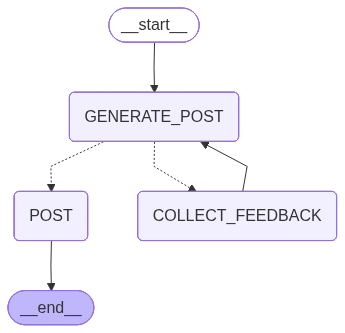

In [ ]:
from IPython.display import Image, display
display(Image(workflow.get_graph().draw_mermaid_png()))

In [ ]:
response = app.invoke({
    "messages": [HumanMessage(content="Write me a LinkedIn post on AI Agents taking over content creation")]
})


📢 Current LinkedIn Post:

## Are AI Agents the Future of Content Creation? 🤔

The lines between human and machine are blurring faster than ever, and content creation is no exception. 🤖  AI agents are making waves, capable of generating compelling text, images, and even video. 

This raises some fascinating questions:

* **Will AI agents replace human creators?** 
* **What new opportunities will emerge for content creators?** 
* **How can we ensure ethical and responsible use of AI in content creation?**

I'm excited to see how this technology evolves and its impact on the industry. 🤔  What are your thoughts? Share your perspectives in the comments below! 👇

#AI #ContentCreation #FutureOfWork #Technology #Innovation #DigitalMarketing


**Pro Tip:**

* **Add a relevant image or video** to your post to make it more engaging.
* **Tag relevant industry influencers or organizations** to spark conversation.
* **Ask a specific question** to encourage interaction and generate discussion.



Po

# HITL USING THE COMMAND CLASS AND INTERUPTS

In [ ]:

from langgraph.graph import StateGraph, START, END
from langgraph.types import Command, interrupt
from typing import TypedDict
from langgraph.checkpoint.memory import MemorySaver

In [ ]:
memory = MemorySaver()

In [ ]:
class State(TypedDict):
    value: str

In [ ]:
def node_a (state: State) :
  print("Node A")
  return Command(
      goto = "node_b",
      update = {
          "value" : state['value'] + 'a'
      }
  )

def node_b (state:State) :
  print("Node B")
  human_response = interrupt("Do you want to go to C or D? Type(C/D) ")
  print(f"Human review value : {human_response}")

  if human_response == "C" :
    return Command(
        goto = "node_c",
        update = {
            "value" : state['value'] + 'b'
        }
    )
  else :
    return Command(
        goto = "node_d",
        update = {
            "value" : state['value'] + 'b'
        }
    )

def node_c(state: State):
    print("Node C")
    return Command(
        goto=END,
        update={
            "value": state["value"] + "c"
        }
    )

def node_d(state: State):
    print("Node D")
    return Command(
        goto=END,
        update={
            "value": state["value"] + "d"
        }
)


In [ ]:
graph = StateGraph(State)

In [ ]:
graph.add_node("node_a", node_a)
graph.add_node("node_b", node_b)
graph.add_node("node_c", node_c)
graph.add_node("node_d", node_d)

In [ ]:
graph.add_edge(START, "node_a")

In [ ]:
app = graph.compile(checkpointer=memory)

In [ ]:
config = {"configurable" : {"thread_id" : "1"}}

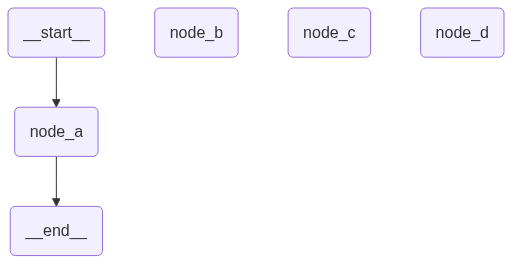

In [ ]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
initialState = {
    "value": ""
}

first_result = app.invoke(initialState, config, stream_mode="updates")
first_result

Node A
Node B


[{'node_a': {'value': 'a'}},
 {'__interrupt__': (Interrupt(value='Do you want to go to C or D? Type(C/D) ', id='8d980ac2942092aa4e167f2328c320b9'),)}]

In [ ]:
print(app.get_state(config).next)

('node_b',)


In [ ]:
second_result = app.invoke(Command(resume="C"), config=config, stream_mode="updates")
second_result

Node B
Human review value : C
Node C


[{'node_b': {'value': 'ab'}}, {'node_c': {'value': 'abc'}}]

# USING THE INTERUPT METHOD (RECOMMENDED)

In [ ]:
from langgraph.graph import MessagesState,StateGraph, END, START
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_tavily import TavilySearch
from langgraph.prebuilt import tools_condition
from langgraph.prebuilt import ToolNode
from IPython.display import Image, display
from typing import Annotated, TypedDict
import operator
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages
from langchain_core.tools import tool
from langchain_openai import ChatOpenAI
from langchain_groq import ChatGroq
from langgraph.checkpoint.memory import MemorySaver

In [ ]:
class AgentState(TypedDict):
    messages: Annotated[list, add_messages]

In [ ]:
tavily=TavilySearch()

In [ ]:
tools = [tavily]

In [ ]:
llm_with_tools = llm_openai_model.bind_tools(tools)

In [ ]:
def ai_assistant(state: AgentState):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

In [ ]:
memory = MemorySaver()

In [ ]:
graph_builder = StateGraph(AgentState)
graph_builder.add_node("ai_assistant", ai_assistant)

tool_node = ToolNode(tools=tools)
graph_builder.add_node("tools", tool_node)

In [ ]:
graph_builder.add_edge(START, "ai_assistant")

graph_builder.add_conditional_edges(
    "ai_assistant",
    tools_condition,
)
graph_builder.add_edge("tools", "ai_assistant")

In [ ]:
app2 = graph_builder.compile(
    checkpointer=memory,
    # This is new!
    interrupt_before=["tools"],
    # Note: can also interrupt __after__ tools, if desired.
    # interrupt_after=["tools"]
)

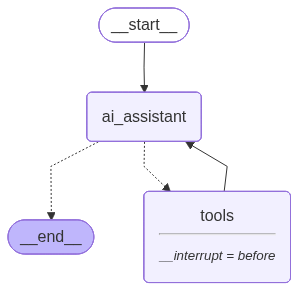

In [ ]:
from IPython.display import Image, display
display(Image(app2.get_graph().draw_mermaid_png()))

In [ ]:
user_input = "what is current a capital of georgia?"
config = {"configurable": {"thread_id": "1"}}

In [ ]:
events = app2.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)

In [ ]:
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================ Human Message =================================

what is current a capital of georgia?
================================== Ai Message ==================================
Tool Calls:
  tavily_search (call_LRgaJBRjNDRo5nyUPBlJJ0yt)
 Call ID: call_LRgaJBRjNDRo5nyUPBlJJ0yt
  Args:
    query: current capital of Georgia


In [ ]:
snapshot = app2.get_state(config)

In [ ]:
snapshot


StateSnapshot(values={'messages': [HumanMessage(content='what is current a capital of georgia?', additional_kwargs={}, response_metadata={}, id='db903347-22e7-4fe7-9c92-3990b0de0cb6'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_LRgaJBRjNDRo5nyUPBlJJ0yt', 'function': {'arguments': '{"query":"current capital of Georgia"}', 'name': 'tavily_search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 1343, 'total_tokens': 1362, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CBJB5AwkpxvOkvVqEypznX1KJULma', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--baf6ef9a-c076-4075-a93f-c5587eae5d54-0', tool_calls=[{'name': 'tavily_search

In [ ]:
snapshot.next

('tools',)

In [ ]:
last_message=snapshot.values["messages"][-1]

In [ ]:
last_message

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_LRgaJBRjNDRo5nyUPBlJJ0yt', 'function': {'arguments': '{"query":"current capital of Georgia"}', 'name': 'tavily_search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 1343, 'total_tokens': 1362, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CBJB5AwkpxvOkvVqEypznX1KJULma', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--baf6ef9a-c076-4075-a93f-c5587eae5d54-0', tool_calls=[{'name': 'tavily_search', 'args': {'query': 'current capital of Georgia'}, 'id': 'call_LRgaJBRjNDRo5nyUPBlJJ0yt', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1343, 'output_tokens': 19, 'total_token

In [ ]:
last_message.tool_calls


[{'name': 'tavily_search',
  'args': {'query': 'current capital of Georgia'},
  'id': 'call_LRgaJBRjNDRo5nyUPBlJJ0yt',
  'type': 'tool_call'}]

In [ ]:
# `None` will append nothing new to the current state, letting it resume as if it had never been interrupted
events = app2.stream(None, config, stream_mode="values")

In [ ]:
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  tavily_search (call_LRgaJBRjNDRo5nyUPBlJJ0yt)
 Call ID: call_LRgaJBRjNDRo5nyUPBlJJ0yt
  Args:
    query: current capital of Georgia
================================= Tool Message =================================
Name: tavily_search

{"query": "current capital of Georgia", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.reddit.com/r/MandelaEffect/comments/11fs0mg/capital_of_georgia_united_states/", "title": "capital of georgia (united states) : r/MandelaEffect - Reddit", "content": "The Georgia capitol is a mandela effect. But people remember Augusta being the current capitol. I went and checked an instagram post I did", "score": 0.88178825, "raw_content": null}, {"url": "https://www.georgiaencyclopedia.org/articles/government-politics/campaign-finance-laws/m-8206/", "title": "Georgia State Capitol", "content": "Atlanta has served as the capital cit

In [ ]:
user_input = "what is a weather there?"

config = {"configurable": {"thread_id": "1"}}

In [ ]:
events = app2.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)

In [ ]:
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================ Human Message =================================

what is a weather there?
================================== Ai Message ==================================
Tool Calls:
  tavily_search (call_s2QQJg2INZrMctRl2EPaZJff)
 Call ID: call_s2QQJg2INZrMctRl2EPaZJff
  Args:
    query: current weather in Atlanta
